In [2]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dummy import *

In [3]:
subs = generate_submissions(users=4, pbls=20)

In [4]:
bm = bianary_mat(subs)
bm

,U00000,U00001,U00002,U00003
P00000,1,0,0,1
P00001,1,0,1,1
P00002,0,0,0,0
P00004,1,1,1,0
P00005,1,1,0,1
P00006,1,0,0,1
P00007,0,1,0,0
P00009,1,1,0,0
P00010,0,0,0,1
P00011,0,1,0,0


In [5]:
def fct(row):
    '''
    u is the a binary verctor
    ''' 
    bads = subs[(subs.veredict != 'AC') & 
                       (subs.problem_id == row[0])].problem_id.count()
    tots = subs[subs.problem_id == row[0]].problem_id.count()
    return (float(bads) / tots)

In [6]:
Difficilties = evaluate_difficuly(bm, name='diff1')
Difficilties = Difficilties.join(evaluate_difficuly(bm, fct, name="diff2"))

In [8]:
Difficilties

,diff1,diff2
P00000,0.165521,0.196131
P00001,0.082761,0.183056
P00002,0.331042,0.261509
P00004,0.082761,0.174339
P00005,0.082761,0.190188
P00006,0.165521,0.196131
P00007,0.248282,0.239716
P00009,0.165521,0.213962
P00010,0.248282,0.235358
P00011,0.248282,0.224150


<IPython.core.display.Javascript object>


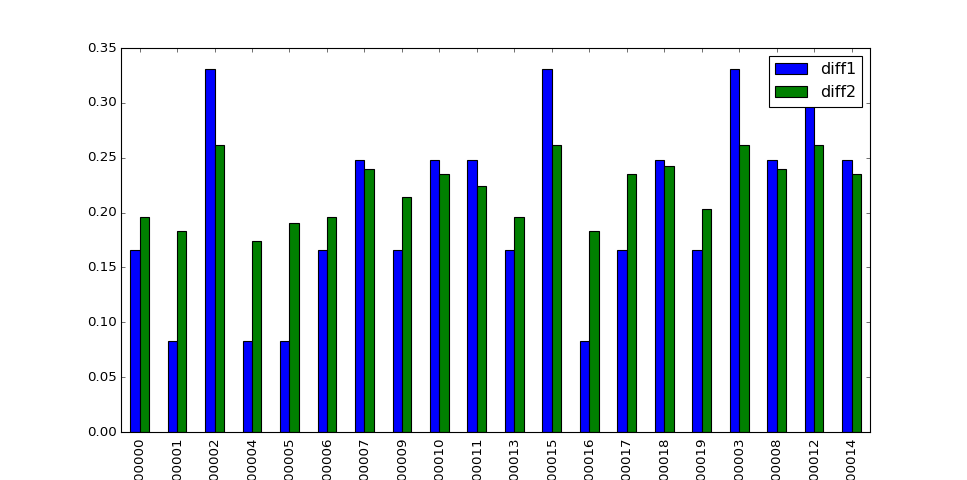

In [15]:
Difficilties.plot(kind='bar')

<IPython.core.display.Javascript object>


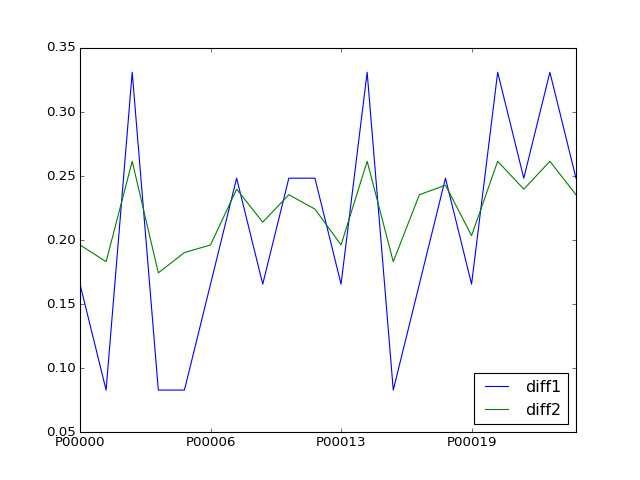

In [10]:
Difficilties.plot()

In [11]:
def Abilities(mat, pblslev):
    df = mat.join(pblslev)
    #print df
    return [df[df[i] > 0 ][pblslev.name].sum() for i in bm]

In [12]:
usrAb = Abilities(bm, Difficilties.diff1)
normalize(usrAb)
usrAb = pd.DataFrame(usrAb, index=bm.columns, columns=['abl1']).T

In [13]:
usrAb2 = Abilities(bm, Difficilties.diff2)
normalize(usrAb2)
usrAb2 = pd.DataFrame(usrAb2, index=bm.columns, columns=['abl2']).T
usrAb = usrAb.append(usrAb2)

<IPython.core.display.Javascript object>


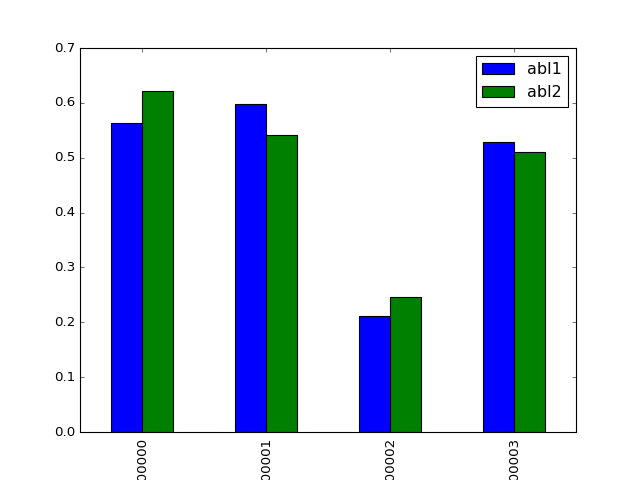

In [14]:
usrAb.T.plot(kind='bar')